<a href="https://colab.research.google.com/github/R3gm/Coursera_Capstone-/blob/main/notebook%20final%20coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

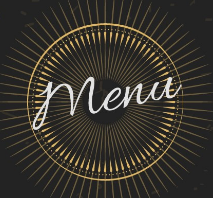

# Notebook capstone Coursera

In [ ]:
import numpy as np # librería para manejar datos vectorizados
import pandas as pd # librería para análisis de datos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # librería para manejar archivos JSON 
from geopy.geocoders import Nominatim # convertir una dirección en valores de latitud y longitud
import requests # librería para manejar solicitudes
from pandas.io.json import json_normalize # librería para convertir un archivo json en un dataframe pandas
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # librería para graficar mapas 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Libraries imported.')

Libraries imported.


Obtenemos la base de datos de los códigos postales de Toronto que nos servirá para obtener la lista de restaurantes cercanos

In [ ]:
url = (r'https://raw.githubusercontent.com/R3gm/Coursera_Capstone-/main/Geospatial_Coordinates.csv')
latlog = pd.read_csv(url)
latlog.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

Definimos el token para usar Foursquare

In [ ]:
headers = {
    "accept": "application/json",
    "Authorization": "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
}

Iteramos cada ubicación para obtener los datos de restaurantes cerca de los códigos postales, aquí se obtendrá de estos restaurantes los siguientes datos:
* Nombre del restaurante
* latitud
* longitud
* precio o costo relativo de los platos
* puntuación del lugar
* popularidad en cuanto a concurrencia de la densidad peatonal

In [ ]:
# definimos listas vacias para los datos de restaurantes
nom = pd.DataFrame([])
nom['Nombre'] = np.nan

precio = pd.DataFrame([])
precio['a'] = np.nan

rating = pd.DataFrame([])
rating['a'] = np.nan

trafico= pd.DataFrame([])
trafico['a'] = np.nan

latitud = pd.DataFrame([])
latitud['a'] = np.nan

longitud = pd.DataFrame([])
longitud['a'] = np.nan

Creamos un diccionario vacío para los datos json

In [ ]:
results = {}
type(results)

dict

Consultamos los datos a Foursquare para cada código postal de Toronto

In [ ]:
import requests
for i in range(len(latlog)):
  url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius=2500&categories=13065&fields=geocodes%2Cprice%2Cpopularity%2Crating%2Cname&limit=40".format(latlog.loc[i][1],latlog.loc[i][2])

  response = requests.get(url, headers=headers)

  print(response.text)

  results[i] = requests.get(url,headers = headers).json()
  results

{"results":[{"geocodes":{"main":{"latitude":43.820788,"longitude":-79.182657},"roof":{"latitude":43.820788,"longitude":-79.182657}},"name":"BeaverTails","popularity":0.8285555541682794,"price":1,"rating":7.3},{"geocodes":{"main":{"latitude":43.798538,"longitude":-79.196043},"roof":{"latitude":43.798538,"longitude":-79.196043}},"name":"Caribbean Wave","popularity":0.9843057445719351,"price":1,"rating":6.8},{"geocodes":{"main":{"latitude":43.801762,"longitude":-79.196543},"roof":{"latitude":43.801762,"longitude":-79.196543}},"name":"Subway","popularity":0.811169515438303,"price":1,"rating":6.4},{"geocodes":{"main":{"latitude":43.802102,"longitude":-79.198097},"roof":{"latitude":43.802102,"longitude":-79.198097}},"name":"Wendy's","popularity":0.9940194523866006,"price":1,"rating":6.2},{"geocodes":{"main":{"latitude":43.800165,"longitude":-79.198453},"roof":{"latitude":43.800165,"longitude":-79.198453}},"name":"Harvey's","popularity":0.9793677350080532,"price":2,"rating":6.3},{"geocodes":{

llenamos los dataframes creados antes con los datos obtenidos de Foursquare

In [ ]:
for i in range(len(results)):
  print(results[i])
  for j in range(len(results[i]['results'])):
    nom = nom.append({'Nombre':results[i]['results'][j]['name']}, ignore_index=True)
    try:
      precio = precio.append({'a':results[i]['results'][j]['price']}, ignore_index=True)
    except:
      precio = precio.append({'a':np.nan}, ignore_index=True)
    try:
      rating = rating.append({'a':results[i]['results'][j]['rating']}, ignore_index=True)
    except:
      rating = rating.append({'a':np.nan}, ignore_index=True)
    try:
      trafico = trafico.append({'a':results[i]['results'][j]['popularity']}, ignore_index=True)
    except:
      trafico = trafico.append({'a':np.nan}, ignore_index=True)
    latitud = latitud.append({'a':results[i]['results'][j]['geocodes']['main']['latitude']}, ignore_index=True)
    longitud = longitud.append({'a':results[i]['results'][j]['geocodes']['main']['longitude']}, ignore_index=True)

{'results': [{'geocodes': {'main': {'latitude': 43.820788, 'longitude': -79.182657}, 'roof': {'latitude': 43.820788, 'longitude': -79.182657}}, 'name': 'BeaverTails', 'popularity': 0.8285555541682794, 'price': 1, 'rating': 7.3}, {'geocodes': {'main': {'latitude': 43.798538, 'longitude': -79.196043}, 'roof': {'latitude': 43.798538, 'longitude': -79.196043}}, 'name': 'Caribbean Wave', 'popularity': 0.9843057445719351, 'price': 1, 'rating': 6.8}, {'geocodes': {'main': {'latitude': 43.801762, 'longitude': -79.196543}, 'roof': {'latitude': 43.801762, 'longitude': -79.196543}}, 'name': 'Subway', 'popularity': 0.811169515438303, 'price': 1, 'rating': 6.4}, {'geocodes': {'main': {'latitude': 43.802102, 'longitude': -79.198097}, 'roof': {'latitude': 43.802102, 'longitude': -79.198097}}, 'name': "Wendy's", 'popularity': 0.9940194523866006, 'price': 1, 'rating': 6.2}, {'geocodes': {'main': {'latitude': 43.800165, 'longitude': -79.198453}, 'roof': {'latitude': 43.800165, 'longitude': -79.198453}},

In [ ]:
trafico.shape

(4001, 1)

Creamos un dataframe con todas las columnas correspondientes a los Restaurantes

In [ ]:
nom.insert(1, "precio", precio)
nom.insert(1, "rating", rating)
nom.insert(1, "trafico_peatonal", trafico)
nom.insert(1, "latitud", latitud)
nom.insert(1, "longitud", longitud)

In [66]:
nom.head()

Nombre   longitud    latitud  trafico_peatonal  rating  precio
0     BeaverTails -79.182657  43.820788          0.828556     7.3     1.0
1  Caribbean Wave -79.196043  43.798538          0.984306     6.8     1.0
2          Subway -79.196543  43.801762          0.811170     6.4     1.0
3         Wendy's -79.198097  43.802102          0.994019     6.2     1.0
4        Harvey's -79.198453  43.800165          0.979368     6.3     2.0

Exportamos los datos obtenidos por si las dudas en un csv

In [ ]:
nom.to_csv('datos de direcciones.csv')

In [ ]:
nom.shape

(4001, 6)

Eliminamos todas las filas con valores NaN del dataframe

In [67]:
er = nom[:]

In [68]:
er = er.dropna()
er.head()

Nombre   longitud    latitud  trafico_peatonal  rating  precio
0     BeaverTails -79.182657  43.820788          0.828556     7.3     1.0
1  Caribbean Wave -79.196043  43.798538          0.984306     6.8     1.0
2          Subway -79.196543  43.801762          0.811170     6.4     1.0
3         Wendy's -79.198097  43.802102          0.994019     6.2     1.0
4        Harvey's -79.198453  43.800165          0.979368     6.3     2.0

In [69]:
er.shape

(3049, 6)

Eliminamos las filas duplicadas

In [70]:
er.duplicated().sum() 

1909

In [71]:
ram = er[:]
ram = ram.drop_duplicates(ram.columns,
                        keep='first')
ram.shape

(1140, 6)

In [72]:
ram.head()

Nombre   longitud    latitud  trafico_peatonal  rating  precio
0     BeaverTails -79.182657  43.820788          0.828556     7.3     1.0
1  Caribbean Wave -79.196043  43.798538          0.984306     6.8     1.0
2          Subway -79.196543  43.801762          0.811170     6.4     1.0
3         Wendy's -79.198097  43.802102          0.994019     6.2     1.0
4        Harvey's -79.198453  43.800165          0.979368     6.3     2.0

En total tenemos 1140 lugares definidos como Restaurantes según los datos proveídos por Foursquare con su respectivo:
* Nombre del restaurante
* latitud
* longitud
* precio o costo relativo de los platillos
* puntuación del lugar
* popularidad en cuanto a concurrencia de la densidad peatonal

Análisis exploratorio

Text(0.5, 0.98, 'Gráficas de caja de las variables de Restaurantes')

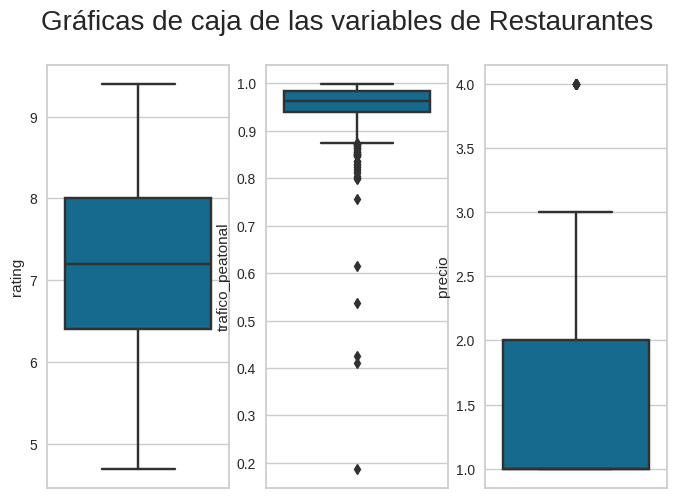

In [73]:
f, axes = plt.subplots(1, 3)
sns.boxplot(  y=ram['rating'],  orient='v' , ax=axes[0])
sns.boxplot(  y=ram['trafico_peatonal'],  orient='v' , ax=axes[1])
sns.boxplot(  y=ram['precio'],  orient='v' , ax=axes[2])
f.suptitle('Gráficas de caja de las variables de Restaurantes', fontsize=20)

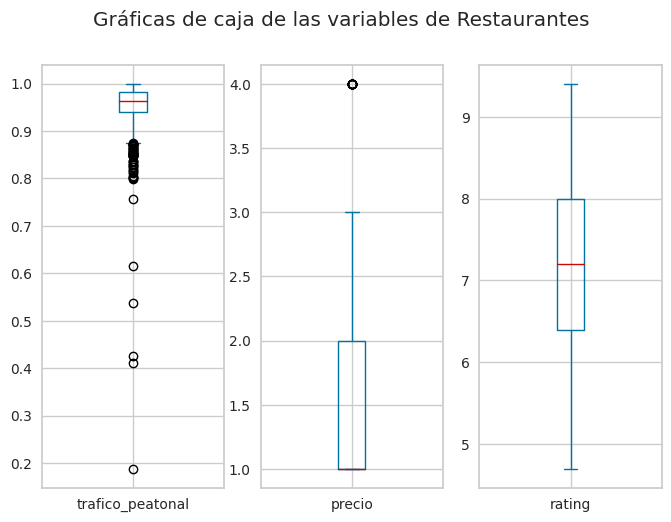

In [74]:
ram[['trafico_peatonal','precio','rating']].plot(kind= 'box', subplots=True, title='Gráficas de caja de las variables de Restaurantes')
plt.style.use('default')
plt.show()

In [75]:
ram[['Nombre','trafico_peatonal','precio','rating']].describe(include='all')

Nombre  trafico_peatonal       precio       rating
count          1140       1140.000000  1140.000000  1140.000000
unique          733               NaN          NaN          NaN
top     Tim Hortons               NaN          NaN          NaN
freq            132               NaN          NaN          NaN
mean            NaN          0.953504     1.554386     7.203070
std             NaN          0.050968     0.676735     0.993225
min             NaN          0.187507     1.000000     4.700000
25%             NaN          0.939964     1.000000     6.400000
50%             NaN          0.963764     1.000000     7.200000
75%             NaN          0.983134     2.000000     8.000000
max             NaN          0.999444     4.000000     9.400000

Por último normalizamos :.)

In [76]:
X = ram.drop(['Nombre','latitud','longitud'],1)
X2 = ram.drop(['trafico_peatonal','rating','precio'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xnor = scaler.fit_transform(X)
Xnor

array([[-2.45259093,  0.09763382, -0.81956646],
       [ 0.60460459, -0.40599763, -0.81956646],
       [-2.79385869, -0.8089028 , -0.81956646],
       ...,
       [-0.42542591, -1.31253425, -0.81956646],
       [ 0.19079444, -1.41326054, -0.81956646],
       [-3.88128174, -1.91689199, -0.81956646]])

Creamos los clusters con K-Means

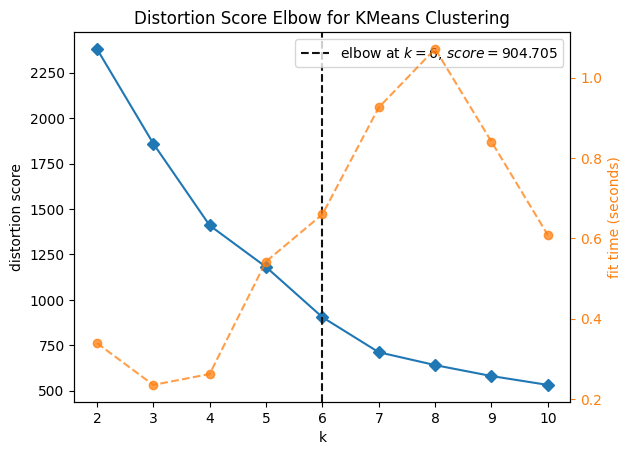

In [78]:
#!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# elbow
model = KMeans(random_state=0)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(Xnor)    
elb_visualizer.show()

In [79]:
elb_visualizer.elbow_value_  

6

In [80]:
k_optimo = elb_visualizer.elbow_value_  

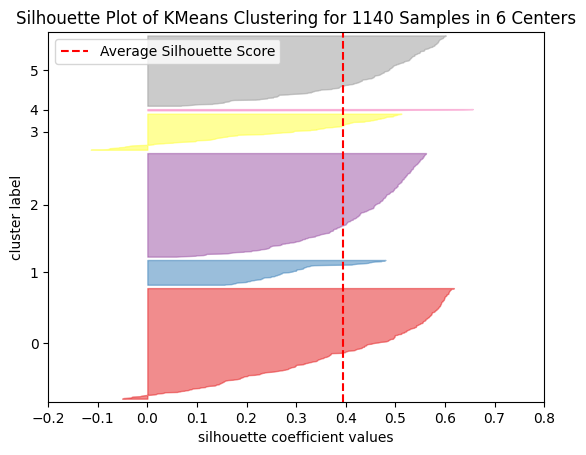

In [81]:
# silhouette; plot para revisar uno por uno k
model_4clust = KMeans(n_clusters = k_optimo, random_state=0) # usamos el k enconrado por elbow

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(Xnor)    
sil_visualizer.show()

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k_optimo ,random_state=0).fit(Xnor)
kmeans.labels_
ram.insert(0, 'Cluster Labels', kmeans.labels_)

Vemos las diferentes características de cada cluster formado

In [83]:
er_g = ram.groupby('Cluster Labels')[['trafico_peatonal','rating','precio']].mean()
er_g

trafico_peatonal    rating    precio
Cluster Labels                                      
0                       0.975202  6.196143  1.192837
1                       0.950498  7.789024  3.231707
2                       0.956958  7.870000  2.000000
3                       0.880737  6.528571  1.310924
4                       0.435065  6.240000  1.400000
5                       0.964098  7.964069  1.000000

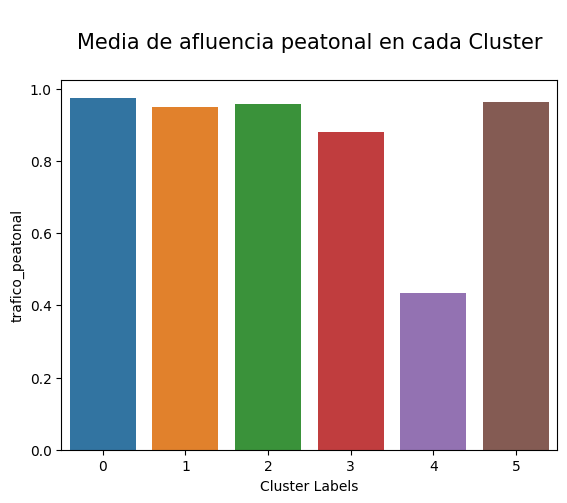

In [84]:
sns.barplot(data= er_g, x= er_g.index, y='trafico_peatonal')
plt.title('\nMedia de afluencia peatonal en cada Cluster\n' ,fontsize= 15)
plt.show()

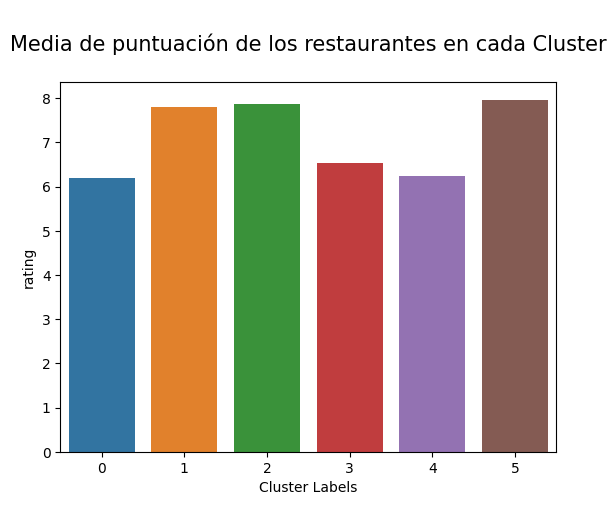

In [85]:
sns.barplot(data= er_g, x= er_g.index, y='rating')
plt.title('\nMedia de puntuación de los restaurantes en cada Cluster\n' ,fontsize= 15)
plt.show()

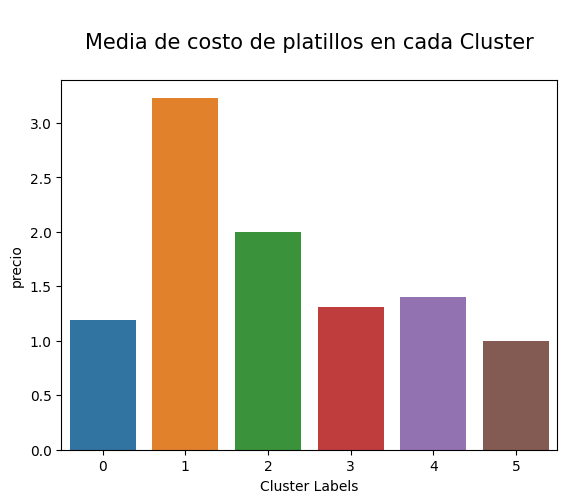

In [86]:
sns.barplot(data= er_g, x= er_g.index, y='precio')
plt.title('\nMedia de costo de platillos en cada Cluster\n' ,fontsize= 15)
plt.show()

Visualizamos los clusters, debido a que son 3 variables las que tomamos, podemos visualizarla en un gráfico 3D

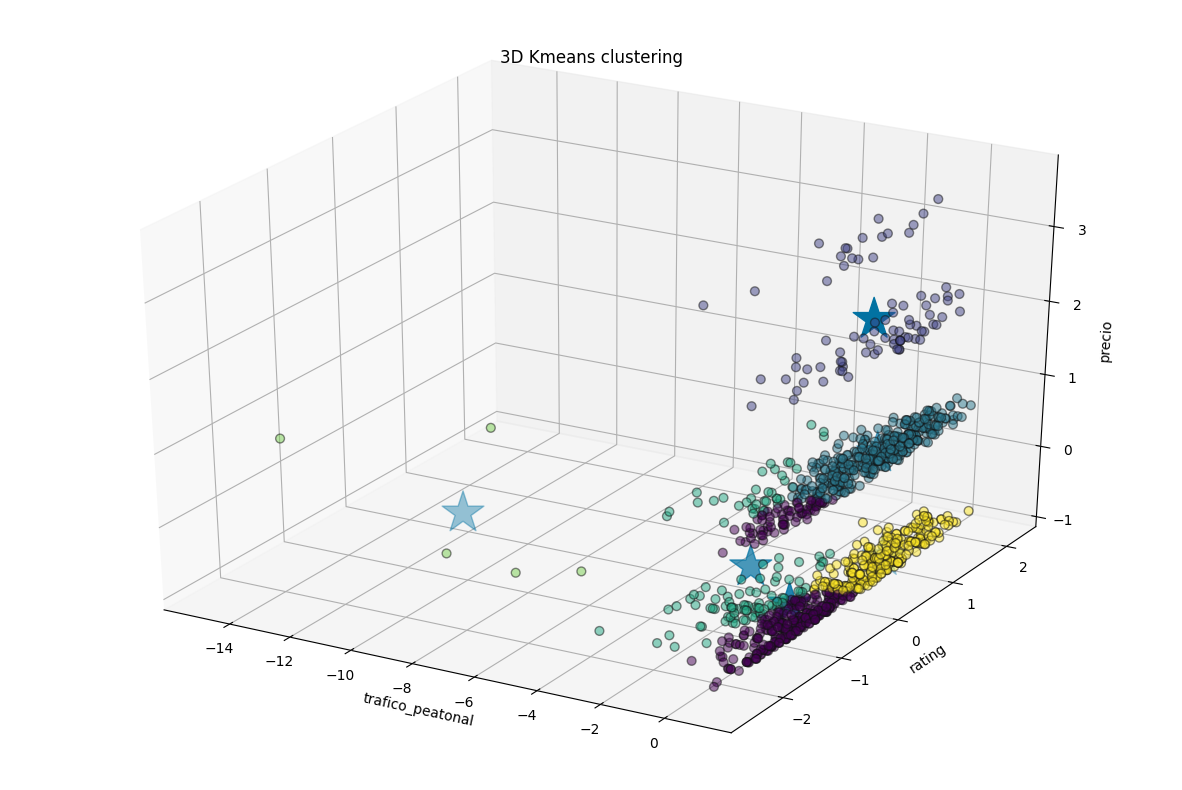

In [87]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create 3d data 
x = Xnor

# cluster data
kmeans = KMeans(init="k-means++", n_clusters=k_optimo, random_state=0)
kmeans.fit(x)

# plot clusters and centroids
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2] ,c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s = 1000, c = 'b',
           marker='*', label = 'Centroid')
ax.set_title("3D Kmeans clustering",fontsize=12)
ax.set_xlabel("trafico_peatonal")
ax.set_ylabel("rating")   
ax.set_zlabel("precio") 
plt.show()

Ubicamos en el mapa los diferentes clusters de los Restaurantes

In [88]:
from folium import plugins
from folium.plugins import HeatMap

#datos
df_folium = pd.DataFrame({'Lat':ram['latitud'],'Long':ram['longitud'],'Count':ram['trafico_peatonal']})

df_folium['weight'] = df_folium['Count'] / df_folium['Count'].abs().max()

def generateBaseMap(loc, zoom=11.5, tiles='OpenStreetMap', crs='ESPG2263'):
    return folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   tiles=tiles)
  
base_map = generateBaseMap([43.681070,-79.447015] ) #localización 

map_values1 = df_folium[['Lat','Long','weight']]

data = map_values1.values.tolist()
           
hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25,
                use_local_extrema=False)#.add_to(base_map)

base_map.add_child(hm)

In [89]:
import folium 
# graficar en base a los clusters
# create map
map_clusters = folium.Map(location=[43.681070,-79.447015],zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(k_optimo)
ys = [i + x + (i*x)**2 for i in range(k_optimo)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(ram['latitud'], ram['longitud'], ram['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# mejores ubicaciones para abrir una nueva sucursal

De entre los clusters se puede identificar que el cluster 5 tiene los mejores rating y precios bajos por lo que competir en estas ubicaciones puede ser desventajoso;sobretodo el cluster 2 de restaurantes sería un rival inmediato de la nueva sucusal; por otro lado en el cluster 3 tiene las mejores características para poder competir siendo que presentan una bajada de rating y precio cercanos a moderados; aún así debemos evitar establecer una sucursal en lugares con poca afluencia de personas, en este punto nos ayudará más el mapa de calor.

# Conclusiones

In [111]:
# elegimos el cluster 5, 3 y 2
k_optimo= 3
rem = ram[(ram['Cluster Labels']==3)|(ram['Cluster Labels']==5)| (ram['Cluster Labels']==2)]
rem['Cluster Labels'].loc[rem['Cluster Labels']==5] = 0
rem['Cluster Labels'].loc[rem['Cluster Labels']==3] = 1
rem.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Cluster Labels            Nombre   longitud    latitud  trafico_peatonal  \
0                1       BeaverTails -79.182657  43.820788          0.828556   
2                1            Subway -79.196543  43.801762          0.811170   
8                1       Tim Hortons -79.193687  43.790611          0.813685   
21               1         Pizza Hut -79.222057  43.806586          0.885958   
40               0  Lamanna's Bakery -79.148482  43.797847          0.990449   

    rating  precio  
0      7.3     1.0  
2      6.4     1.0  
8      6.3     2.0  
21     6.1     1.0  
40     9.0     1.0

In [113]:
import folium 
# graficar en base a los clusters
# create map
map_clusters = folium.Map(location=[43.681070,-79.447015],zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(k_optimo)
ys = [i + x + (i*x)**2 for i in range(k_optimo)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(rem['latitud'], rem['longitud'], rem['Cluster Labels']):
    label = folium.Popup('{},{} Cluster {}'.format(lat,lon,cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


df_folium = pd.DataFrame({'Lat':ram['latitud'],'Long':ram['longitud'],'Count':ram['trafico_peatonal']})

df_folium['weight'] = df_folium['Count'] / df_folium['Count'].abs().max()

def generateBaseMap(loc, zoom=11.5, tiles='OpenStreetMap', crs='ESPG2263'):
    return  folium.Map(location=loc,
                   control_scale=True, 
                   zoom_start=zoom,
                   tiles=tiles)
  
#base_map = generateBaseMap([43.681070,-79.447015] ) #localización 

map_values1 = df_folium[['Lat','Long','weight']]

data = map_values1.values.tolist()
           
hm = HeatMap(data,gradient={0.1: 'blue', 0.3: 'lime', 0.5: 'yellow', 0.7: 'orange', 1: 'red'}, 
                min_opacity=0.05, 
                max_opacity=0.9, 
                radius=25,
                use_local_extrema=False)#.add_to(base_map)

map_clusters.add_child(hm)


# circulos
folium.CircleMarker([43.689525,-79.295024], radius=50).add_to(map_clusters)
folium.CircleMarker([43.683466,-79.323869], radius=40).add_to(map_clusters)
map_clusters

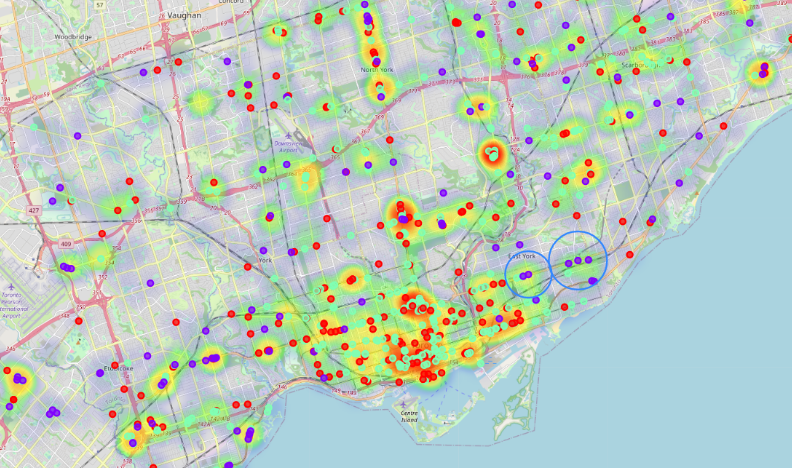

Analizando los diferentes clusters de los restauarntes los lugares más prometedores para establecer una nueva sucursar serían las ubicaciones de 
```
latitud, logitud
43.689525,-79.295024
43.683466,-79.323869
```





```
ROGER SAUL CONDORI FLORES
09-10-2022

```

